**Download** (right-click, save target as ...) this page as a jupyterlab notebook [Lab18](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab18/Lab18.ipynb)

___

# <font color=darkred>Laboratory 18: Interval Estimates </font>

LAST NAME, FIRST NAME

R00000000

ENGR 1330 Laboratory 18 - In-Lab 

___


In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty
sensei
/opt/jupyterhub/bin/python3
3.8.10 (default, Sep 28 2021, 16:10:42) 
[GCC 9.3.0]
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)


---

## Example 1: Italy & Soccer: How many people love soccer? <br>
*inspired by :*
1. __"A (very) friendly introduction to Confidence Intervals"__ by __Dima Shulga__ available at* https://towardsdatascience.com/a-very-friendly-introduction-to-confidence-intervals-9add126e714 <br>
2. __"Introduction of Confidence Interval"__ by __Irfan Rahman__ available at* https://medium.com/steps-towards-data-science/confidence-interval-a7fb3484d7b4 <br>

![](https://about.fb.com/wp-content/uploads/2014/07/soccer_analysis.jpg?w=960) <br><br>

*hint: According to UN estimate data, almost 60 million (60,449,841) people live in Italy <br>

For the first example in this lab, we are going to look at a problem from two perspectives, or two "modes" if you may: <br>
The **GOD** mode and The **MAN mode**. 

<figure>
    <img src="https://media.borntowin.net/Creazione-di-Adamo-The-Creation-of-Adam-Detail-Hands.jpg" alt="Trulli" style="width:70%">
    <figcaption align = "center">
         <b><br>Figure 1. Hands of God and Adam, Detail from The Creation of Adam,  Sistine Chapel by Michelangelo. (c. 1508–1512)   </b>
    </figcaption>
</figure>

### The GOD MODE:
In **GOD mode**, we are assuming that we know **EVERYTHING** about our population (in this case, the population of Italy). 
Suppose we know (theoretically) the exact percentage of people in Italy that love soccer and it’s 75%. <br>

- Let's say we want to know the chance of randomly selecting a group of 1000 people that only 73% of them love soccer!

In [1]:
totalpop = 60*10**6  # Total adult population of Italy (60M)
fbl_p = 0.75           #percentage of those loving soccer|football !
fblpop = int(totalpop * fbl_p)         #Population of those who love football
nfblpop = int(totalpop * (1-fbl_p))     #Population of those who doesn't love football

- Let's create a numpy array with 60 million elements, with a 1 for each one person who loves soccer, and zero otherwise.

In [2]:
import numpy as np
fblpop_1 = np.ones(fblpop)         #An array of "1"s | its length is equal to the population of those who love football | DO NOT ATTEMPT TO PRINT!!!
nfblpop_0 = np.zeros(nfblpop)      #An array of "0"s | its length is equal to the population of those who doesn't love football | DO NOT ATTEMPT TO PRINT!!!
totpop_01 = np.hstack([fblpop_1,nfblpop_0])     #An array of "0 & 1"s | its length is equal to the total population of Italy | DO NOT ATTEMPT TO PRINT!!!

- As a check, we can get the percentage of "1"s in the array by calculating the mean of it, and indeed it is 75%.

In [3]:
print(np.mean(totpop_01))

0.75


- Now, lets take few samples and see what percentage do we get:

In [4]:
np.mean(np.random.choice(totpop_01, size=1000)) # Run multiple times

0.771

In [5]:
# Let's do it in a more sophisticated/engineery/data sciency way!
for i in range(10): #Let's take 10 samples
    sample = np.random.choice(totpop_01, size=1000)
    print('Sample', i, ':', np.mean(sample))

Sample 0 : 0.743
Sample 1 : 0.725
Sample 2 : 0.766
Sample 3 : 0.706
Sample 4 : 0.76
Sample 5 : 0.763
Sample 6 : 0.742
Sample 7 : 0.753
Sample 8 : 0.772
Sample 9 : 0.744


You can see that we’re getting different values for each sample, but the intuition (and statistics theory) says that the average of large amount of samples should be very close to the real percentage. Let’s do that! lets take many samples and see what happens:

In [6]:
values = []     #Create an empty list
for i in range(10000):     #Let's take 10000 samples 
    sample = np.random.choice(totpop_01, size=1000)     #Notice that the sample size is not changing
    mean = np.mean(sample)
    values.append(mean)     #Store the mean of each sample set
print(np.mean(values))     #Printing the mean of means!
values = np.array(values)
print(values.std())       #Printing the standard deviation of means!

0.7500309000000001
0.013768491028068411


We created 10000 samples, checked the percentage of people who love soccer in each sample, and then just averaged them. we got 74.99% which is very close to the real value 75% that we as **GOD** knew! <br>

Let’s plot a histogram of all the values we got in all the samples. Interestingly, this histogram is  very similar to the normal distribution!<br>

/opt/jupyterhub/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jupyterhub/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


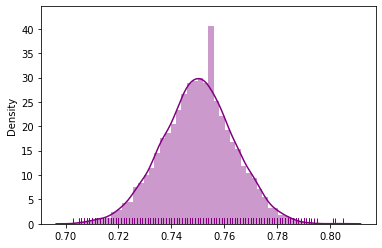

In [7]:
import seaborn as sns # a nice package, with useful tools

sns.distplot(values,color='purple', rug=True,kde=True);  # the semi-colon suppresses the object address, but still shows the plot

if we do this process a very large number of times (infinite number of times) we will get an histogram that is very close to the normal distribution and we can know the parameters of this distribution. (**The next code block takes a looong time to run, ~minutes**)

In [10]:
values = []     #Create an empty list
for i in range(1000000):     #Let's take 1000000 samples 
    sample = np.random.choice(totpop_01, size=1000)     #Notice that the sample size is not changing
    mean = np.mean(sample)
    values.append(mean)     #Store the mean of each sample set
    if i%100000 == 0:  # a little printing to keep us awake
        print(i," samples")
print(np.mean(values))     #Printing the mean of means!

0  samples
100000  samples
200000  samples
300000  samples
400000  samples
500000  samples
600000  samples
700000  samples
800000  samples
900000  samples
0.7499671620000004


/opt/jupyterhub/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jupyterhub/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


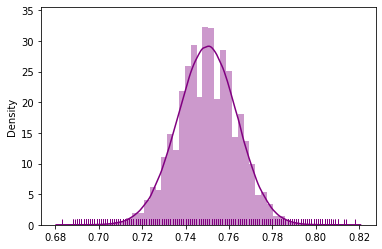

In [11]:
import seaborn as sns

sns.distplot(values,color='purple', rug=True,kde=True);

First of all, we can see that the center (the mean) of the histogram is near 75%, exactly as we expected, but we are able to say much more just by looking at the histogram, for example, we can say, that half of the samples are larger than 75%, or, we can say that roughly 25% are larger than 76%. We can also say that almost 95% of the samples are between 72% and 78%. Let's also have a look at the boxplot:

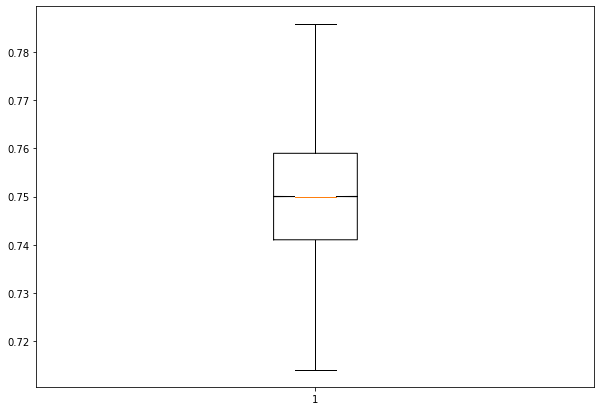

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot (values,1, '')
plt.show()

At this point, many people might ask two important questions, “How can I take infinite number of samples?” and “How does it helps me?”. <br>

The answer to the first one is that if you are **GOD**, there is no stopping you! If you are not **GOD**, you can't! <br>

To asnwer the second question, Let’s go back to our example, we initially took one sample of 1000 people and got a value close to 75% but not exactly 75%. We wanted to know, what is the chance that a random sample of 1000 people will have 73% soccer lovers. Using the information above, we can say that there’s a chance of (roughly) 20% that we’ll get a value that is smaller or equal to 73%. <br>

We don’t actually need to do the infinite samples. In other words, you don't have to be **GOD!** You will know why and how in a few moments...

### The MAN MODE:

![](https://i.kym-cdn.com/photos/images/newsfeed/000/770/871/1a9.gif)

Back in our horrid and miserable Man mode, we don’t know the actual percentage of soccer lovers in Italy. In fact, we know nothing about the population. 
![](https://ozinparis.com/wp-content/uploads/2016/04/jon-snow-know-nothing-e1461048094110-1.jpg)

We do know one thing though: We just took a sample and got 73%. But how does it help us? <br>

What we also **DO** know, is that if we took infinite number of samples, the distibution of their **means** will look something like this: <br>
![](https://miro.medium.com/max/548/1*txu8-J2imhlqIPDqsL3gPA.png) <br>

Here μ is the population **mean** (real percentage of soccer lovers in our example), and σ is the standard deviation of the population. 
If we know this (and we know the standard deviation) we are able to say that ~68% of the samples will have a **mean** that falls in the red area or, more than 95% of the samples will have a **mean** that falls outside the green area (in the middle) in this plot: <br>
![](https://miro.medium.com/max/563/1*GX0Qft3_Js0O9gbd9BeCNA.png) <br>

This is where the concept of margin of error becomes of great importance:<br>
<img src="https://www.wallstreetmojo.com/wp-content/uploads/2019/03/Margin-of-Error-Formula.jpg" alt="Trulli" style="width:50%"> <br>

<img src="https://www.statisticsfromatoz.com/uploads/7/3/2/1/73216723/graph-alpha-moe-jpg_1_orig.jpg" alt="Trulli" style="width:50%"> <br>


 Let's mix the GOD mode and the MAN mode. LET's DO MAD MODE!
 
![](https://static1.squarespace.com/static/59ab26c6ff7c50083fca77c3/5b68af2caa4a99da3bc129cc/5d66957e721ad20001fe1190/1567004323841/Jacob+Wrestles+God.jpg?format=150w) <br>

Of course the distance is symmetric, So if the sample percentage will fall 95% of the time between real percentage-3 and real percentage +3, then the real percentage will be 95% of the times between sample percentage -3 and sample percentage +3.

/opt/jupyterhub/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jupyterhub/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


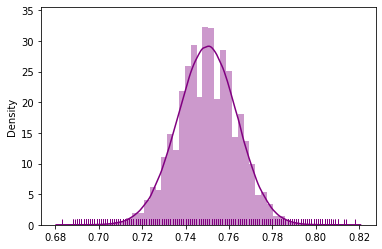

In [14]:
import seaborn as sns
sns.distplot(values,color='purple', rug=True,kde=True);

If we took a sample and got 73%, we can say that we are 95% confident that the real percentage is between 70% (73 -3) and 76% (73+3).
This is a Confidence Interval Estimate, the interval is 73 +- 3 and the confidence is 95% (or the Type-I error probability is 5%).

![](https://ineedpeakpt.com/wp-content/uploads/2019/05/Mind-Blowing-EMR-and-Meaningful-Use-Stats-and-Facts.gif) <br>
---

---

## Example2: 
From a normally distributed population, we randomly took a sample of 500 students with a mean score of 461 on the math section of SAT. Suppose the standard deviation of the population is 100, what is the estimated true population mean for the 95% confidence interval.

In [16]:
# Step 1- Organize the data
n = 500                       #Sample size
Xbar = 461                    #Sample mean
C = 0.95                      #Confidence level
std = 100                     #Standard deviation (σ)
z = 1.96                      #The z value associated with 95% Confidence Interval

In [17]:
# Assuming a normally distributed population
# Assuming randomly selected samples
# Step2- Calculate the margin of error
import math
margin = z*(std/math.sqrt(n))
print('The margin of error is equal to : ',margin)

The margin of error is equal to :  8.765386471799175


In [18]:
# Step3- Find the estimated true population mean for the 95% confidence interval
# To find the range of values you just have to add and subtract 8.765 from 461
low = Xbar-margin
high = Xbar+margin
print('the true population mean will be captured within the confidence interval of (',low,' , ',high,') and the confidence is 95%')

the true population mean will be captured within the confidence interval of ( 452.23461352820084  ,  469.76538647179916 ) and the confidence is 95%


---

## Exercise: 
From a normally distributed population, we randolmy took a sample of 200 dogs with a mean weight of 70 pounds. Suppose the standard deviation of the population is 20: <br>
- What is the estimated true population mean for the 95% confidence interval? <br>
- How about 90% confidence interval? <br>
- How about 99% confidence interval? <br>

In [19]:
# Step 1- Organize the data

In [20]:
# Step2- Calculate the margin of error

In [21]:
# Step3- Find the estimated true population mean for the 90%; 95% confidence interval

## References

1.  __"Confidence Intervals for Machine Learning"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/confidence-intervals-for-machine-learning/ <br>
2.  __"Comprehensive Confidence Intervals for Python Developers"__ available at* https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers <br>
3.  __"Confidence Interval"__ available at* http://napitupulu-jon.appspot.com/posts/confidence-interval-coursera-statistics.html <br>
4.  __"Introduction to Confidence Intervals"__ available at* https://courses.lumenlearning.com/introstats1/chapter/introduction-confidence-intervals/ <br>
5.  __"Understanding Confidence Intervals: Statistics Help"__ by __Dr Nic's Maths and Stats__ available at* https://www.youtube.com/watch?v=tFWsuO9f74o <br>
6.  __"Confidence intervals and margin of error | AP Statistics | Khan Academy"__ by __Khan Academy__ available at* https://www.youtube.com/watch?v=hlM7zdf7zwU <br>
7.  __"StatQuest: Confidence Intervals"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=TqOeMYtOc1w <br>